In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
petal_length = data.data[:, 2]  # Petal length
petal_width = data.data[:, 3]   # Petal width


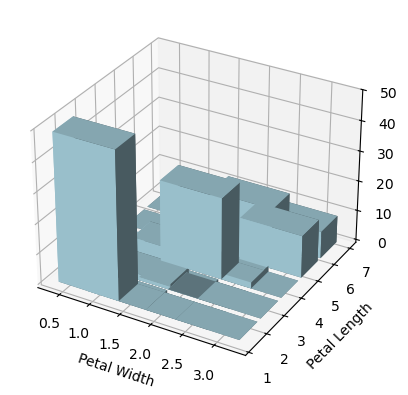

In [2]:
# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 2D histogram for petal length and petal width
hist, xedges, yedges = np.histogram2d(petal_width, petal_length, bins=5)

# Construct arrays for the bars
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Size of bars in each dimension
dx = dy = np.ones_like(zpos)
dz = hist.ravel()

# Plot the 3D bar plot
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='lightblue', zsort='average')

# Label the axes
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Count')

plt.show()

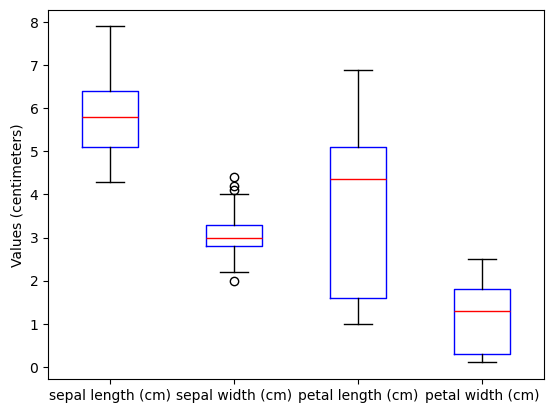

In [5]:
features = data.data
feature_names = data.feature_names

# Create a box plot for each feature
plt.boxplot(features, notch=False, patch_artist=False, boxprops=dict(color="blue"), medianprops=dict(color="red"))

# Set x-axis labels and y-axis label
plt.xticks(range(1, len(feature_names) + 1), feature_names, rotation=0)
plt.ylabel("Values (centimeters)")

plt.show()

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


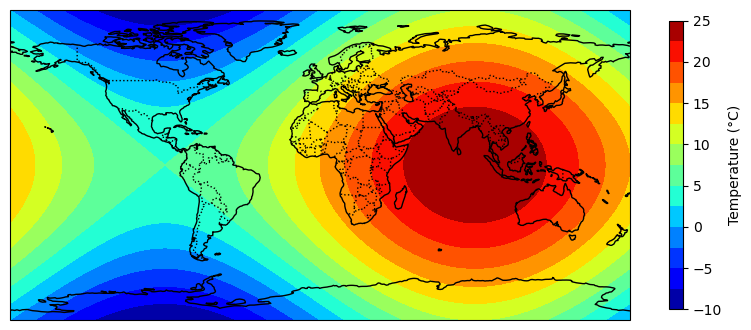

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a sample temperature dataset (you can replace this with real data)
lon = np.linspace(-180, 180, 360)  # Longitude values
lat = np.linspace(-90, 90, 180)    # Latitude values
lon, lat = np.meshgrid(lon, lat)

# Create a synthetic global temperature pattern as sample data
temperature = 15 * np.cos(np.radians(lat)) + 10 * np.sin(np.radians(lon))

# Plotting
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
contour = ax.contourf(lon, lat, temperature, levels=15, cmap='jet', transform=ccrs.PlateCarree())

# Add coastlines and features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Add colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.75)
cbar.set_label('Temperature (°C)')

# Display the plot
plt.show()

In [10]:
import plotly.express as px
import plotly.io as pio
#import plotly.offline as pyo

#pyo.init_notebook_mode(connected=True)
pio.renderers.default = 'iframe'

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

In [14]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width'] 

#print(features.shape[1]) # 4 features

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

4


/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [15]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=6)
fig.show()

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



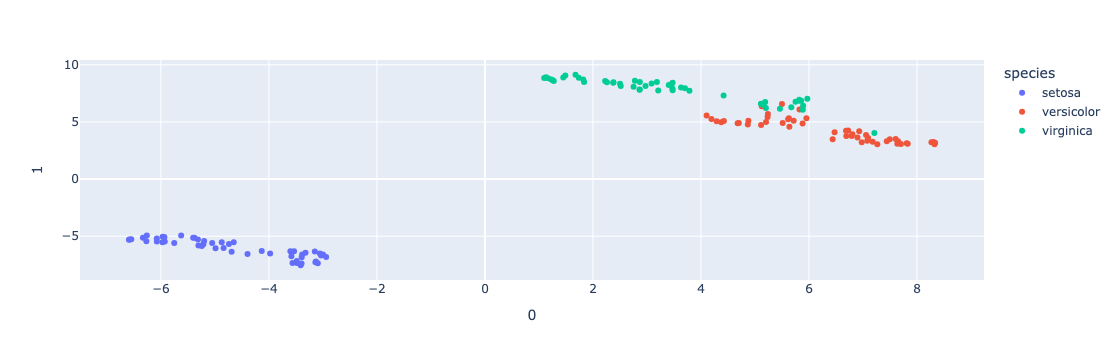

In [3]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()


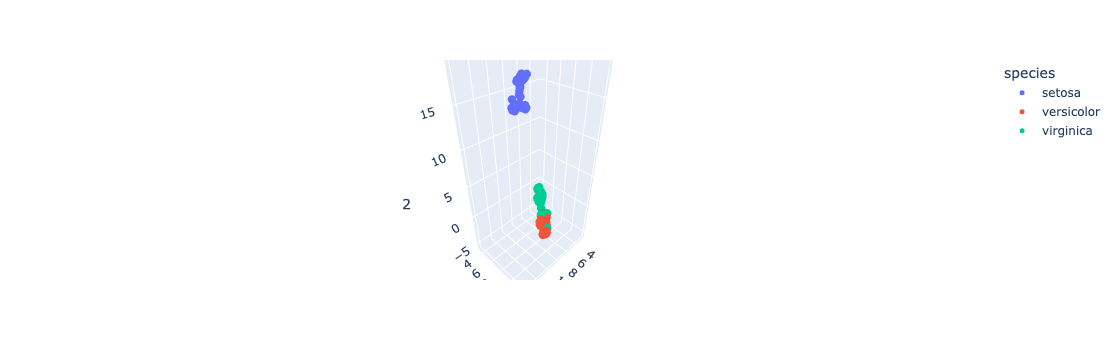

In [4]:
fig_3d.show()

/Users/zijun/Documents/anaconda3/envs/class/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



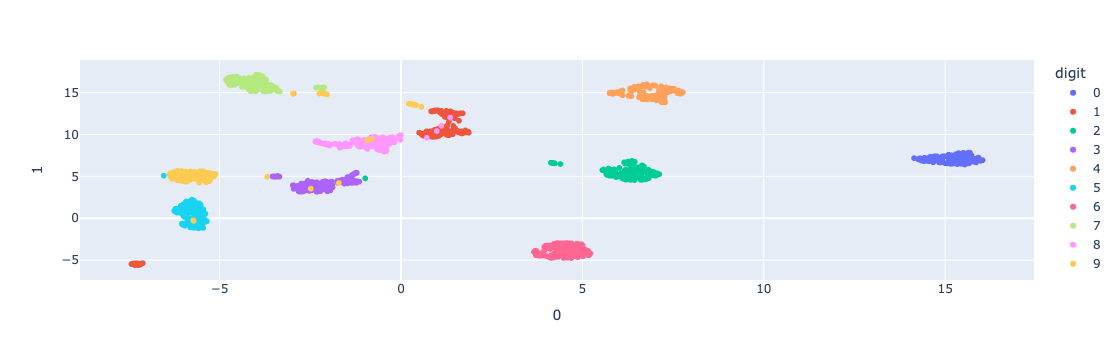

In [5]:
import plotly.express as px
from sklearn.datasets import load_digits
from umap import UMAP

digits = load_digits()

umap_2d = UMAP(random_state=0)
umap_2d.fit(digits.data)

projections = umap_2d.transform(digits.data)

fig = px.scatter(
    projections, x=0, y=1,
    color=digits.target.astype(str), labels={'color': 'digit'}
)
fig.show()